In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils import load_data, add_features, add_labels

In [3]:
asset_data = load_data("USDBRL=X", "2020-01-01", "2023-10-01")
asset_data = add_features(add_labels(asset_data))
asset_data.head()

/home/felipe-nicoletti/Projetos/Pessoal/market-data-market-prediction-ml-study/utils.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date, interval="1wk")
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,target,returns,volatility,ma_4,ma_12,ma_ratio
Date,,,,,,,,,,,
2020-03-18,5.1417,5.2105,4.976100,5.009900,0,1,0.028546,0.021153,4.834000,4.434806,1.090014
2020-03-25,5.1927,5.2040,4.973900,5.098600,0,1,0.009919,0.013171,5.014075,4.529165,1.107064
2020-04-01,5.2853,5.3513,5.185842,5.203900,0,0,0.017833,0.005596,5.154675,4.624123,1.114736
2020-04-08,5.1985,5.2447,5.050000,5.221600,0,1,-0.016423,0.024222,5.204550,4.708290,1.105401
2020-04-15,5.3154,5.3173,5.159709,5.160036,0,1,0.022487,0.027514,5.247975,4.800731,1.093162


<Axes: title={'center': 'Target Distribution'}, xlabel='target'>

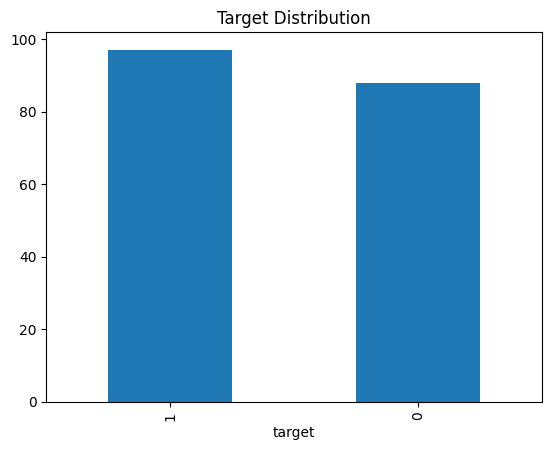

In [4]:
asset_data["target"].value_counts().plot(kind='bar', title='Target Distribution')

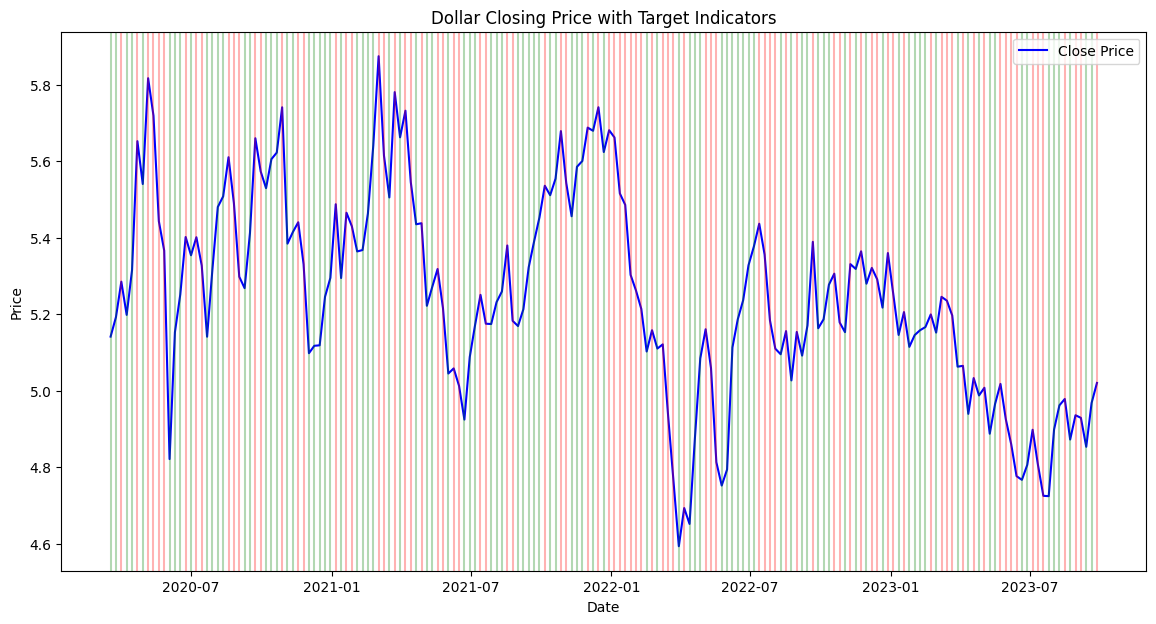

In [5]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=asset_data, x=asset_data.index, y="Close", label="Close Price", color="blue")

for i in range(len(asset_data)):
    color = "green" if asset_data["target"].iloc[i] == 1 else "red"
    plt.axvline(x=asset_data.index[i], color=color, alpha=0.3, linestyle="-")

plt.title("Dollar Closing Price with Target Indicators")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [6]:
def plot_subplots(data, plots, figsize=(14, 15), sharex=True):
    fig, ax = plt.subplots(len(plots), 1, figsize=figsize, sharex=sharex)

    for i, plot in enumerate(plots):
        ax[i].plot(data.index, data[plot['column']], label=plot['label'], color=plot['color'])
        ax[i].set_title(plot['title'])
        ax[i].set_ylabel(plot['ylabel'])
        ax[i].legend()

    ax[-1].set_xlabel("Date")
    plt.show()


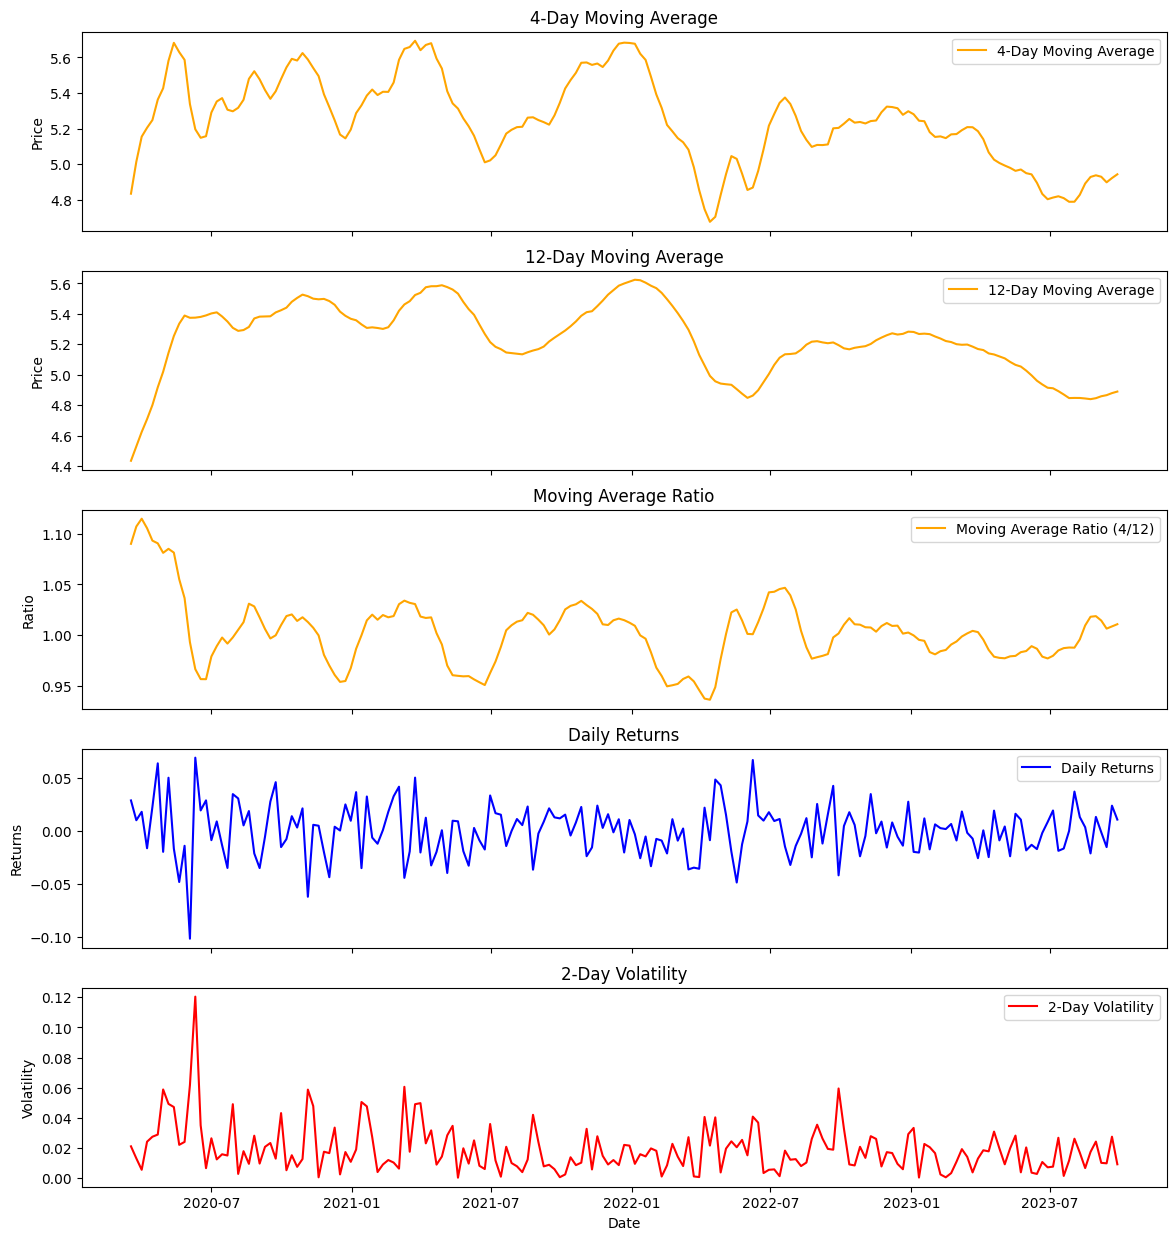

In [7]:
plot_subplots(
    data=asset_data,
    plots=[
        {
            "column": "ma_4",
            "label": "4-Day Moving Average",
            "color": "orange",
            "title": "4-Day Moving Average",
            "ylabel": "Price"
        },
        {
            "column": "ma_12",
            "label": "12-Day Moving Average",
            "color": "orange",
            "title": "12-Day Moving Average",
            "ylabel": "Price"
        },
        {
            "column": "ma_ratio",
            "label": "Moving Average Ratio (4/12)",
            "color": "orange",
            "title": "Moving Average Ratio",
            "ylabel": "Ratio"
        },
        {
            "column": "returns",
            "label": "Daily Returns",
            "color": "blue",
            "title": "Daily Returns",
            "ylabel": "Returns"
        },
        {
            "column": "volatility",
            "label": "2-Day Volatility",
            "color": "red",
            "title": "2-Day Volatility",
            "ylabel": "Volatility"
        }
    ]
)

<Axes: >

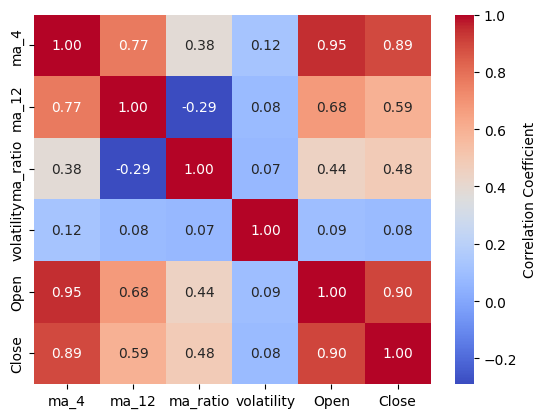

In [8]:
sns.heatmap(
    asset_data[["ma_4","ma_12", "ma_ratio", "volatility","Open", "Close"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={"label": "Correlation Coefficient"}
)

<Axes: xlabel='Date', ylabel='Close'>

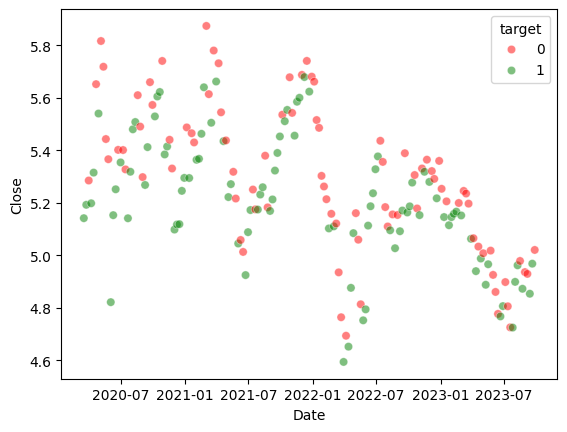

In [9]:
sns.scatterplot(
    data=asset_data,
    y="Close",
    x="Date",
    hue="target",
    palette={0: "red", 1: "green"},
    alpha=0.5,
    legend="full"
)